## GDD/KDD CSV generation
Generate CSV with GDD/KDD values for all years

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
#%matplotlib inline
import time
import glob
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os

# Figure factory 
import plotly 
import plotly.figure_factory as ff
import geopandas

import requests
import plotly.express as px
#from urllib3.request import urlopen
import json
import requests
from urllib.request import urlopen

# Get county info for plotting 
response = urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
counties = json.load(response)


df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

In [3]:
#GDD and KDD functions
def KDD_fn(x, threshold):
    if x < threshold:
        return 0
    if x >= threshold:
        return x - threshold
def GDD_fn(x, t1, t2):
    if x <t1:
        return 0
    if t1<=x<t2:
        return x-t1
    if x>=t2:
        return 24

In [13]:
# state = "Nebraska"
# state2 = "Iowa"
# state3 = "Kansas"
# states = [state.upper(), state2.upper(), state3.upper()]
county_yield = pd.read_csv("../../data/data_yield/USA_county_yield_gsw.csv")
# state_yield = county_yield.loc[county_yield['State'] == state.upper()]
filenames = glob.glob("/Users/julianschmitt/Downloads/Direcho/processed/*/*") # get all processed files
state_lc = os.listdir("/Users/julianschmitt/Downloads/Direcho/processed")
states = [state.upper() for state in state_lc]
counties = np.unique([str("_".join(file.split("_")[1:3])) for file in filenames])
print(f"This script will regress {len(states)} states and {len(counties)} counties.")

This script will regress 12 states and 907 counties.


In [15]:
def KDD_GDD(counties, years):
    KDD_rep = pd.DataFrame([], columns=["year","state","county","KDD","GDD"])
    for ii in range(len(years)):
        for i in range(len(counties)):
            single_county = [elt for elt in filenames if counties[i] in elt]
            county_KDD, county_GDD = [], []
            for filename in single_county:
                try: # catch if file does not cooperate
                    wind = pd.read_csv(filename)
                except:
                    continue
                wind["Year"] = [int(yr) for yr in wind["Year"]]
                wind = wind.loc[(wind["Month"]<=10) & (wind["Month"]>=4)] # filter months
                wind = wind.loc[wind["Year"]==years[ii]] # filter year
                #wind = wind.loc[wind['Month']==1]
                wind = wind[["Year","Month","Day","Hour","temp_10"]]
                wind = pd.DataFrame(wind.groupby(["Year","Month","Day"])['temp_10'].max())
                year, month, day = [elt[0] for elt in wind.index],[elt[1] for elt in wind.index], \
                                    [elt[2] for elt in wind.index]
                temp_10 = [elt[0] for elt in wind.values]
                wind = pd.DataFrame({"Year":year, "Month":month, "Day":day, 'temp_10':temp_10})
                KDD = sum([KDD_fn(x, 32) for x in wind['temp_10'].values if type(x) != type(None)])
                GDD = sum([GDD_fn(x, 8,32) for x in wind['temp_10'].values if type(x) != type(None)])
                county_KDD.append(KDD)
                county_GDD.append(GDD)
            KDD_mean = np.mean([KDD for KDD in county_KDD if KDD !=0])
            GDD_mean = np.mean([GDD for GDD in county_GDD if GDD !=0])
            state, county = counties[i].split("_")[0], counties[i].split("_")[1]
            KDD_rep = KDD_rep.append({"year":years[ii], "state":state, "county":county, "KDD":KDD_mean, "GDD":GDD_mean}, ignore_index=True)
        print(years[ii])
    return KDD_rep

In [ ]:
%%time
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
KDD_GDD_all = KDD_GDD(counties, years)

/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

2007


/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

2008


/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/covid/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeW

In [ ]:
KDD_GDD_all.to_csv("~/Downloads/Direcho/KDD_GDD_12.csv")

## We Turn to our Wind Speed Computation

In [5]:
print(filenames[0])
county_yield.head()

/Users/julianschmitt/Downloads/Direcho/processed/Iowa/78679_Iowa_Clayton_5.csv


,GEOID,Year,Year_2,State,State_ANSI,County,County_ANSI,lat,lon,Commodity,...,ln_yield,tmean,gdd_10_28,kdd_28,ppt,swdown,smrz,smrz_2,ppt_2,swdown_2
0,1043,2000,4000000.0,ALABAMA,1.0,CULLMAN,43.0,34.131923,-86.869267,CORN,...,4.094345,20.728573,10.510035,0.662003,3.517464,5.733637,NaN,NaN,94.704399,35.756950
1,1043,2001,4004001.0,ALABAMA,1.0,CULLMAN,43.0,34.131923,-86.869267,CORN,...,4.990433,19.766562,10.117532,0.287366,4.715416,5.418226,NaN,NaN,116.203275,32.780945
2,1043,2002,4008004.0,ALABAMA,1.0,CULLMAN,43.0,34.131923,-86.869267,CORN,...,4.532599,20.387165,10.668972,0.420518,4.802636,5.537177,NaN,NaN,122.546751,33.485168
3,1043,2003,4012009.0,ALABAMA,1.0,CULLMAN,43.0,34.131923,-86.869267,CORN,...,4.795791,20.178537,10.298344,0.272478,4.536163,5.230230,NaN,NaN,116.863832,30.876053
4,1043,2004,4016016.0,ALABAMA,1.0,CULLMAN,43.0,34.131923,-86.869267,CORN,...,4.867534,20.461144,10.623413,0.309911,3.485957,5.515142,NaN,NaN,64.746069,32.963717


In [6]:
def plot_data(filenames = filenames, height = 'wind speed at 10m (m/s)'):
    data_plt = []
    hourly_winds = [] # array of arrays of windspeeds 
    for i in range(len(filenames)):
        wind_i = pd.read_csv(filenames[i], low_memory = False)
        county_name = filenames[i].split("_")[-2].upper() # extract county name
        state_name = filenames[i].split("_")[-3].upper() # extract state name
        county_data = county_yield.loc[(county_yield['County'] == county_name) \
                                       & (county_yield['State']==state_name)] # kansas yeild data
        c_year = county_data["Year"].unique() 
        w_year = wind_i["Year"].unique()
        years = np.intersect1d(c_year, w_year) # finds all common values -essentially just the wind years 
        # filter years 
        county_gs = county_data[county_data["Year"].isin(years)] 
        wind_gs = wind_i[wind_i["Year"].isin(years)]
        wind_gs = wind_gs[(wind_gs["Month"] >= 4) & (wind_gs["Month"] <= 10)] # growing season
        for y in years:
            wind_gs_y = wind_gs.loc[wind_gs["Year"] == y] # grab data
            county_gs_y = county_gs.loc[county_gs["Year"] == y]
            w_gs_y = wind_gs_y[height] # compute for specific height
            average_winds = np.mean(w_gs_y)
            average_winds2 = np.mean(w_gs_y**2)
            average_winds3 = np.mean(w_gs_y**3)
            # year, state county, ln_yield, GDD, KDD  - merge with average wind speeds
            data = np.append(county_gs_y.iloc[:,[1,3,5,12,14,15]].values, [average_winds, average_winds2, average_winds3]).tolist() #,12,14,15
            data_plt.append(data) # append to data
            hourly_winds.append(w_gs_y) # all wind speeds
    return data_plt, hourly_winds

In [7]:
data_plt, hourly_winds = plot_data(filenames, 'wind_10ms')
data_plt = np.array(data_plt)
df_plt = pd.DataFrame(data_plt, columns = ['Year', 'State', 'County', 'Log-Yield', 'GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3"])
print(df_plt.head())

   Year State   County      Log-Yield            GDD              KDD  \
0  2007  IOWA  CLAYTON  5.15675380223  7.43380789989  0.0984222028663   
1  2008  IOWA  CLAYTON   5.1416635565  6.28517927701  0.0409709213702   
2  2009  IOWA  CLAYTON  5.14807570322  5.86338003293  0.0440638385313   
3  2010  IOWA  CLAYTON  5.17558460117  7.70899994322   0.102755987244   
4  2012  IOWA  CLAYTON  5.02978411294  8.04393350353   0.343046074541   

   MeanWindspeed     Windspeed2     Windspeed3  
0  4.05199182243  20.4403349104  120.161853679  
1   3.8940478972  18.8857610397  108.550314519  
2  3.66085475078  17.2111650506  96.1474380808  
3  3.88104361371  19.2181676402  114.691309655  
4  3.85211253894  18.7025119354  107.663409391  


In [86]:
df_plt.loc[df_plt['County']=="CLAYTON"]

,Year,State,County,Log-Yield,GDD,KDD,MeanWindspeed,Windspeed2,Windspeed3,ST_CO
0,2007,IOWA,CLAYTON,5.156754,7.433808,0.098422,4.051992,20.440335,120.161854,IOWA_CLAYTON
1,2008,IOWA,CLAYTON,5.141664,6.285179,0.040971,3.894048,18.885761,108.550315,IOWA_CLAYTON
2,2009,IOWA,CLAYTON,5.148076,5.863380,0.044064,3.660855,17.211165,96.147438,IOWA_CLAYTON
3,2010,IOWA,CLAYTON,5.175585,7.709000,0.102756,3.881044,19.218168,114.691310,IOWA_CLAYTON
4,2012,IOWA,CLAYTON,5.029784,8.043934,0.343046,3.852113,18.702512,107.663409,IOWA_CLAYTON
5,2013,IOWA,CLAYTON,5.199601,6.529068,0.124511,4.004262,19.583878,111.015118,IOWA_CLAYTON
6,2014,IOWA,CLAYTON,5.174453,6.552737,0.038522,5.027383,30.742301,219.193449,IOWA_CLAYTON
168,2007,IOWA,CLAYTON,5.156754,7.433808,0.098422,4.616369,26.378048,176.045046,IOWA_CLAYTON
169,2008,IOWA,CLAYTON,5.141664,6.285179,0.040971,4.486147,24.609178,158.916997,IOWA_CLAYTON
170,2011,IOWA,CLAYTON,5.230039,7.058398,0.202298,4.437029,24.509551,160.230375,IOWA_CLAYTON


In [102]:
# convert data types and average windspeeds across stations
df_plt[['Log-Yield','GDD','KDD','MeanWindspeed','Windspeed2','Windspeed3']]= \
                                df_plt.drop(['Year','State','County'], axis=1).astype('float64')
df_plt['Year'] = df_plt['Year'].astype('int32')

df_mean = df_plt.groupby(by=["Year","State","County"], axis=0, as_index=False).mean()
print(len(df_mean.groupby(by=['State','County'])['GDD']), len(np.unique(df_mean['County'])))
df_mean['ST_CO'] = df_mean['State']+'_'+df_mean['County']
df_mean.head()

(169, 147)


,Year,State,County,Log-Yield,GDD,KDD,MeanWindspeed,Windspeed2,Windspeed3,ST_CO
0,2007,IOWA,ADAIR,5.079539,8.827336,0.269945,4.829405,27.944305,184.880274,IOWA_ADAIR
1,2007,IOWA,ADAMS,5.033049,8.864975,0.246143,4.427608,23.920338,149.587169,IOWA_ADAMS
2,2007,IOWA,ALLAMAKEE,5.118592,7.383881,0.092555,4.584940,25.870346,168.197058,IOWA_ALLAMAKEE
3,2007,IOWA,APPANOOSE,5.023881,8.892102,0.269358,4.343938,22.764804,139.172739,IOWA_APPANOOSE
4,2007,IOWA,AUDUBON,5.079539,8.491336,0.227822,4.713565,26.997187,179.144035,IOWA_AUDUBON


In [120]:
len(df_mean[df_mean['ST_CO'] == counties[19].upper()].copy())

0

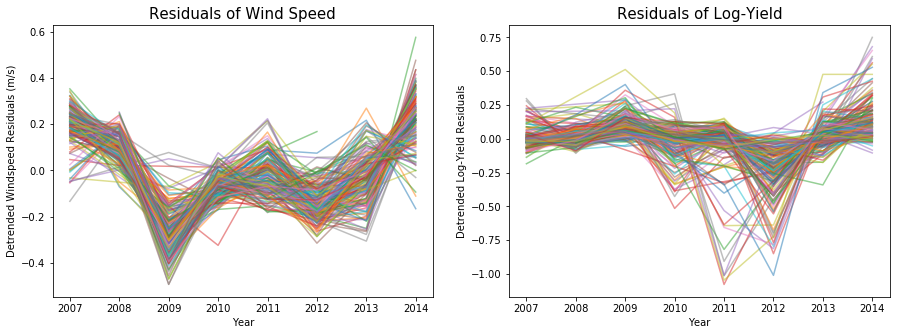

In [123]:
data_df = pd.DataFrame(columns = ['Year', 'County', 'LogYield', 'GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3", 'Windspeed Residuals', 'LogYieldResiduals'])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(len(counties)):
    data = df_mean[df_mean['ST_CO'] == counties[i].upper()].copy()
    covariates = data['Year'].astype(float).values.reshape(-1, 1)
    if len(data)==0:
        continue
    ys = data['MeanWindspeed'].astype(float)
    model = LinearRegression()
    model.fit(covariates, ys)
    y_preds = model.predict(covariates)
    residuals = ys - y_preds
    data.loc[:, 'MeanWindspeed'] = residuals # added this line!
    ax[0].plot(covariates, residuals, alpha = 0.5)
    ys2 = data['Log-Yield'].astype(float)
    model.fit(covariates, ys2)
    y_preds2 = model.predict(covariates)
    residuals2 = ys2 - y_preds2
    data.loc[:, 'LogYieldResiduals'] = residuals2 #added this line!
    ax[1].plot(covariates, residuals2, alpha = 0.5)
    data_df = data_df.append(data)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Detrended Windspeed Residuals (m/s)")
ax[0].set_title("Residuals of Wind Speed", fontsize=15)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Detrended Log-Yield Residuals")
ax[1].set_title("Residuals of Log-Yield", fontsize=15);

In [125]:
fig.savefig("mean_ws_residuals.png", dpi=300)

## Compute Growing and Killing Winds
As corn is pollinated largely through wind and not by insects, we include a growing wind factor to see if growing winds have some impact. Essentially we think that there is a small positive benefit to having slow moving winds from pollination/drying etc, but higher wind values are damaging

In [158]:
# We define the following metrics for growing and killing winds 
def kill_winds(windspeed, threshold):
    if windspeed <= threshold:
        return 0
    else:
        return windspeed - threshold
kill_vectorized = np.vectorize(kill_winds)

def grow_winds(windspeed, threshold):
    if windspeed <= 2:
        return windspeed
    elif (windspeed>2) & (windspeed<threshold-2):
        return 2
    elif (windspeed <= threshold) & (windspeed > threshold-2):
        return threshold - windspeed
    else:
        return 0
grow_vectorized = np.vectorize(grow_winds)

#GDD and KDD functions
def KDD_fn(x, threshold):
    if x < threshold:
        return 0
    if x >= threshold:
        return x - threshold
def GDD_fn(x, t1, t2):
    if x <t1:
        return 0
    if t1<=x<t2:
        return x-t1
    if x>=t2:
        return 24

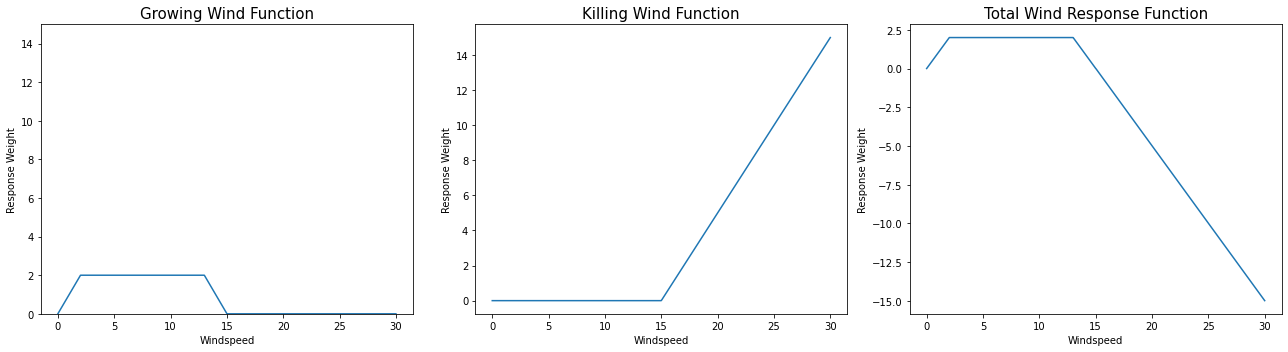

In [167]:
x = np.linspace(0,30, 2000)
y_grow = [grow_winds(t, 15) for t in x]
y_kill = [kill_winds(t, 15) for t in x]
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(x,y_grow)
ax[1].plot(x,y_kill)
ax[2].plot(x, np.concatenate([y_grow[0:1000], np.negative(y_kill[999:-1])]))
ax[0].set_title("Growing Wind Function", fontsize=15)
ax[1].set_title("Killing Wind Function", fontsize=15)
ax[2].set_title("Total Wind Response Function", fontsize=15)
ax[0].set_xlabel("Windspeed")
ax[1].set_xlabel("Windspeed")
ax[2].set_xlabel("Windspeed")
ax[0].set_ylabel("Response Weight")
ax[1].set_ylabel("Response Weight");
ax[2].set_ylabel("Response Weight")
ax[0].set_ylim((0,15));
plt.tight_layout()
#fig.savefig("response_functions.png", dpi=300)

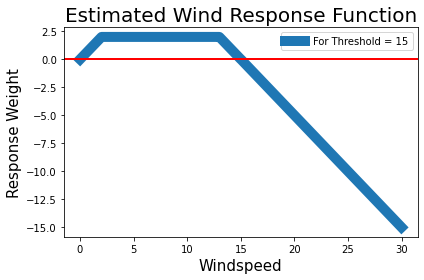

In [183]:
plt.plot(x, np.concatenate([y_grow[0:1000], np.negative(y_kill[999:-1])]), linewidth=10, label='For Threshold = 15')
plt.axhline(y=0, color='r', linewidth=2)
plt.title("Estimated Wind Response Function", fontsize=20)
plt.xlabel("Windspeed", fontsize=15)
plt.ylabel("Response Weight", fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("../windresponsefunction.png", dpi=300)

# Code for running Regression is below!!!

In [186]:
def compute_KD(filenames = filenames, height = 'wind_10ms', threshold = 15):
    """ Takes a list of wind data files and returns 
         - location based metrics: year, state, county
         - log-yield
         - sum of windspeed, windspeed^2, windspeed^3
         - GDD, KDD, KW, and GW derived from the data
        Returns in a big dataframe
    """
    data_plt = []
    #hourly_winds = [] # array of arrays of windspeeds 
    for i in range(len(filenames)):
        wind_i = pd.read_csv(filenames[i], low_memory = False)
        county_name = filenames[i].split("_")[-2].upper() # extract county name
        state_name = filenames[i].split("_")[-3].upper() # extract state name
        county_data = county_yield.loc[(county_yield['County'] == county_name) \
                                       & (county_yield['State']==state_name)] # kansas yeild data
        c_year = county_data["Year"].unique() 
        w_year = wind_i["Year"].unique()
        years = np.intersect1d(c_year, w_year) # finds all common values -essentially just the wind years 
        # filter years 
        county_gs = county_data[county_data["Year"].isin(years)] 
        wind_gs = wind_i[wind_i["Year"].isin(years)]
        wind_gs = wind_gs[(wind_gs["Month"] >= 4) & (wind_gs["Month"] <= 10)] # growing season
        for y in years:
            wind_raw = wind_gs.loc[wind_gs["Year"] == y][height].values # grab wind data
            county_gs_y = county_gs.loc[county_gs["Year"] == y] # get yield data
            #w_gs_y = wind_gs_y[height] # compute for specific height
            average_winds = np.mean(wind_raw)
            average_winds2 = np.mean(wind_raw**2) # sum of squares
            average_winds3 = np.mean(wind_raw**3) # sum of cubes
            # Compute the killing and growing wind values over wind_raw
            kill_w = np.sum([kill_winds(t,threshold) for t in wind_raw])
            grow_w = np.sum([grow_winds(t,threshold) for t in wind_raw])
            # compute KDD and GDD
            temperature_raw = wind_gs.loc[wind_gs["Year"] == y]["temp_10"].values
            KDD = np.sum([KDD_fn(t, 30) for t in temperature_raw])
            GDD = np.sum([GDD_fn(t, 8, 30) for t in temperature_raw])
            # year, state county, ln_yield, GDD, KDD  - merge with average wind speeds
            data = np.append(county_gs_y.iloc[:,[1,3,5,12,16,20]].values, [GDD, KDD, average_winds, average_winds2, average_winds3, kill_w, grow_w]).tolist()
            data_plt.append(data) # append to data
    data_plt = np.array(data_plt)
    df_plt = pd.DataFrame(data_plt, columns = ['Year', 'State', 'County', 'lnyield', 'PPT','PPT2','GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3", "KW","GW"])
    print(df_plt.head())
    # convert to correct datatype
    df_plt[['lnyield','PPT','PPT2','GDD','KDD','MeanWindspeed','Windspeed2','Windspeed3','KW','GW']]= \
                                df_plt.drop(['Year','State','County'], axis=1).astype('float64')
    df_plt['Year'] = df_plt['Year'].astype('int32')
    print(df_plt.head())
    df_mean = df_plt.groupby(by=["Year","State","County"], axis=0, as_index=False).mean()
    df_mean['ST_CO'] = df_mean['State']+'_'+df_mean['County'] # get unique county identifiers
    df_mean['PPT_SQUARE'] = df_mean['PPT']**2 # add precipitation squared variable for regression
    return df_mean

In [187]:
df_wind = compute_KD()
df_wind.head()

   Year State   County            lnyield                PPT  \
0  2007  IOWA  CLAYTON   5.15675380222625   4.18782247640569   
1  2008  IOWA  CLAYTON   5.14166355650266  4.592434597678599   
2  2009  IOWA  CLAYTON   5.14807570321749   3.23870154116866   
3  2010  IOWA  CLAYTON  5.175584601165741   4.23046269809672   
4  2012  IOWA  CLAYTON   5.02978411293502   2.14103130172384   

                 PPT2                 GDD                 KDD  \
0  116.16955023450899   51860.39333333334  101.33500000000006   
1    139.530728851884   43860.64083333334   40.83916666666674   
2   72.77118040691529  39712.604166666664    85.1691666666667   
3    136.588064314587  50956.598333333335  115.56583333333336   
4    39.0330855539664          50653.4725   597.0658333333333   

        MeanWindspeed          Windspeed2          Windspeed3    KW  \
0  4.0519918224299065   20.44033491043614  120.16185367932245   0.0   
1   3.894047897196262  18.885761039719625  108.55031451927572   0.0   
2  3.660854

,Year,State,County,lnyield,PPT,PPT2,GDD,KDD,MeanWindspeed,Windspeed2,Windspeed3,KW,GW,ST_CO,PPT_SQUARE
0,2007,IOWA,ADAIR,5.079539,3.993148,112.651826,57887.373056,693.198611,4.829405,27.944305,184.880274,0.626667,9981.280000,IOWA_ADAIR,15.945231
1,2007,IOWA,ADAMS,5.033049,4.207266,122.573888,59614.319444,977.962500,4.427608,23.920338,149.587169,0.270000,9871.293333,IOWA_ADAMS,17.701086
2,2007,IOWA,ALLAMAKEE,5.118592,4.936085,146.507475,48660.082500,60.519167,4.584940,25.870346,168.197058,0.000000,9917.990000,IOWA_ALLAMAKEE,24.364932
3,2007,IOWA,APPANOOSE,5.023881,4.188674,200.578639,59099.760556,621.055833,4.343938,22.764804,139.172739,1.690000,9986.193333,IOWA_APPANOOSE,17.544992
4,2007,IOWA,AUDUBON,5.079539,3.935192,128.757192,56630.139444,591.733333,4.713565,26.997187,179.144035,1.116667,9960.830000,IOWA_AUDUBON,15.485739


(array([  1.,   0.,   2.,  12.,  37., 118., 285., 423., 380.,  66.]),
 array([ 9136.72 ,  9242.728,  9348.736,  9454.744,  9560.752,  9666.76 ,
         9772.768,  9878.776,  9984.784, 10090.792, 10196.8  ]),
 <BarContainer object of 10 artists>)

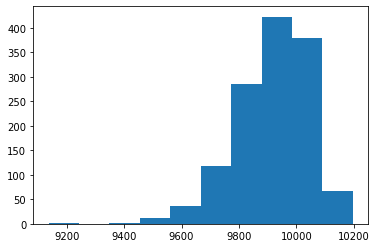

In [190]:
plt.hist(df_wind["GW"].values)

In [102]:

#df_wind2 = df_wind.loc[df_wind['State'] != "KANSAS"]
#df_wind2 = df_wind.rename(columns={"Log-Yield":"lnyield"})
df_wind2['PPT_SQUARE'] = df_wind['PPT']**2
#fit = sm.OLS('LogYieldResiduals ~ C(Year) + C(County) + GDD + KDD + KW + GW', data=df_wind).fit() 
#fit = sm.OLS('LogYieldResiduals ~ KDD', data=df_wind).fit() 
# X = df_wind[["GDD","KDD", "Year","KW","GW"]]
# Y = df_wind["Log-Yield"]
model = ols('lnyield ~ C(Year) + C(County) + GDD + KDD + KW + GW + PPT + PPT_SQUARE', data=df_wind2).fit() 
#model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnyield   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     21.76
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          6.09e-256
Time:                        19:35:10   Log-Likelihood:                 770.53
No. Observations:                1324   AIC:                            -1221.
Df Residuals:                    1164   BIC:                            -390.9
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.6530      0.404     13.994      0.000       4.860       6.446
C(Year)[T.2008]               -0.0729      0.024     -3.041      0.002      -0.120      -0.026
C(Year)[T.2009]                0.0411      0.031      1.347      0.178      -0.019       0.101
C(Year)[T.2010]               -0.0511      0.019     -2.736      0.006      -0.088      -0.014
C(Year)[T.2011]                0.1515      0.028      5.443      0.000       0.097       0.206
C(Year)[T.2012]                0.0157      0.030      0.529      0.597      -0.042       0.074
C(Year)[T.2013]               -0.0325      0.022     -1.466      0.143      -0.076       0.011
C(Year)[T.2014]               -0.0220      0.020     -1.113      0.266      -0.061       0.017
C(County)[T.ADAMS]             0.1557      0.064      2.437      0.015       0.030       0.281
C(County)[T.ALLAMAKEE]         0.0045      0.073      0.061      0.951      -0.140       0.149
C(County)[T.ANDERSON]         -0.3683      0.079     -4.688      0.000      -0.522      -0.214
C(County)[T.ANTELOPE]          0.0556      0.074      0.753      0.452      -0.089       0.201
C(County)[T.APPANOOSE]        -0.2743      0.073     -3.754      0.000      -0.418      -0.131
C(County)[T.ATCHISON]         -0.0436      0.076     -0.576      0.565      -0.192       0.105
C(County)[T.AUDUBON]           0.0647      0.072      0.894      0.371      -0.077       0.207
C(County)[T.BENTON]            0.0553      0.073      0.756      0.450      -0.088       0.199
C(County)[T.BLACK HAWK]        0.0190      0.073      0.261      0.794      -0.124       0.162
C(County)[T.BOONE]             0.0532      0.064      0.836      0.404      -0.072       0.178
C(County)[T.BREMER]            0.0197      0.073      0.269      0.788      -0.124       0.163
C(County)[T.BROWN]             0.1726      0.074      2.344      0.019       0.028       0.317
C(County)[T.BUCHANAN]          0.0283      0.073      0.387      0.699      -0.115       0.172
C(County)[T.BUENA VISTA]       0.0443      0.073      0.609      0.543      -0.099       0.187
C(County)[T.BUFFALO]           0.1597      0.073      2.191      0.029       0.017       0.303
C(County)[T.BURT]              0.0493      0.072      0.681      0.496      -0.093       0.191
C(County)[T.BUTLER]            0.0619      0.063      0.979      0.328      -0.062       0.186
C(County)[T.CALHOUN]           0.0236      0.074      0.320      0.749      -0.121       0.168
C(County)[T.CARROLL]           0.0265      0.073      0.365      0.715      -0.116       0.169
C(County)[T.CASS]              0.0467      0.063      0.740      0.459      -0.077       0.170
C(County)[T.CEDAR]             0.0209      0.063      0.333      0.739      -0.102       0.144
C(County)[T.CERRO GORDO]      -0.0292      

In [111]:
model.rsquared_adj

0.71384541497382

0       15.945231
1       17.701086
2       24.364932
3       17.544992
4       15.485739
          ...    
1319     6.949439
1320     6.791734
1321    13.944610
1322    13.180259
1323    14.240934
Name: PPT, Length: 1324, dtype: float64

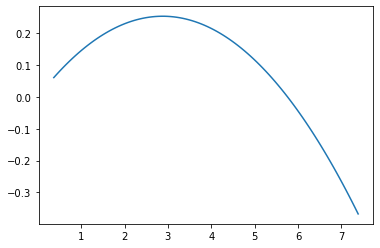

In [95]:
xmin, xmax = county_yield['ppt'].min(), county_yield['ppt'].max()
x = np.linspace(xmin,xmax, 100)
x2 = x*x
y = model.params['PPT']*x+model.params['PPT_SQUARE']*x2
plt.plot(x,y)
df_wind['PPT']**2

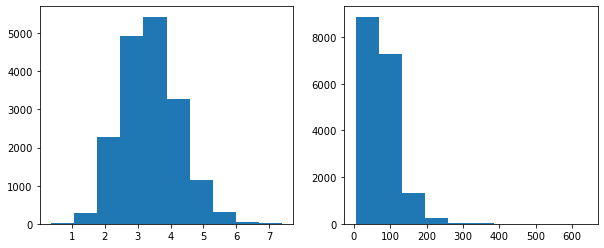

In [90]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(county_yield['ppt'].values)
ax[1].hist(county_yield['ppt_2'].values);

In [70]:
dct = {"threshold":threshold, "Coef KW":model.params["KW"], "KW Pvalue":model.pvalues["KW"], "KW SE":model.bse['KW']}
dct

{'Coef KW': -0.17335358010562718,
 'KW Pvalue': 0.28638621183679447,
 'KW SE': 0.162533498710904}

In [152]:
def compute_KD_loop(filenames, height, threshold_cv):
    """ Takes a list of wind data files and returns 
         - location based metrics: year, state, county
         - log-yield
         - sum of windspeed, windspeed^2, windspeed^3
         - GDD, KDD, KW, and GW derived from the data
        Returns in a big dataframe
    """
    data_plt = []
    #hourly_winds = [] # array of arrays of windspeeds 
    for i in range(len(filenames)):
        wind_i = pd.read_csv(filenames[i], low_memory = False)
        county_name = filenames[i].split("_")[-2].upper() # extract county name
        state_name = filenames[i].split("_")[-3].upper() # extract state name
        county_data = county_yield.loc[(county_yield['County'] == county_name) \
                                       & (county_yield['State']==state_name)] # kansas yeild data
        c_year = county_data["Year"].unique() 
        w_year = wind_i["Year"].unique()
        years = np.intersect1d(c_year, w_year) # finds all common values -essentially just the wind years 
        # filter years 
        county_gs = county_data[county_data["Year"].isin(years)] 
        wind_gs = wind_i[wind_i["Year"].isin(years)]
        wind_gs = wind_gs[(wind_gs["Month"] >= 4) & (wind_gs["Month"] <= 10)] # growing season
        for y in years:
            wind_raw = wind_gs.loc[wind_gs["Year"] == y][height].values # grab wind data
            county_gs_y = county_gs.loc[county_gs["Year"] == y] # get yield data
            #w_gs_y = wind_gs_y[height] # compute for specific height
            average_winds = np.mean(wind_raw)
            average_winds2 = np.mean(wind_raw**2) # sum of squares
            average_winds3 = np.mean(wind_raw**3) # sum of cubes
            # Compute the killing and growing wind values over wind_raw
            kill_w = np.sum([kill_winds(t,threshold_cv) for t in wind_raw])
            grow_w = np.sum([grow_winds(t,threshold_cv) for t in wind_raw])
            print(kill_w, grow_w)
            # compute KDD and GDD
            temperature_raw = wind_gs.loc[wind_gs["Year"] == y]["temp_10"].values
            KDD = np.sum([KDD_fn(t, 30) for t in temperature_raw])
            GDD = np.sum([GDD_fn(t, 8, 30) for t in temperature_raw])
            # year, state county, ln_yield, GDD, KDD  - merge with average wind speeds
            data = np.append(county_gs_y.iloc[:,[1,3,5,12,16,20]].values, [GDD, KDD, average_winds, average_winds2, average_winds3, kill_w, grow_w]).tolist()
            data_plt.append(data) # append to data
    data_plt = np.array(data_plt)
    df_plt = pd.DataFrame(data_plt, columns = ['Year', 'State', 'County', 'lnyield', 'PPT','PPT2','GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3", "KW","GW"])
    # convert to correct datatype
    df_plt[['lnyield','PPT','PPT2','GDD','KDD','KW','GW','MeanWindspeed','Windspeed2','Windspeed3']]= \
                                df_plt.drop(['Year','State','County'], axis=1).astype('float64')
    df_plt['Year'] = df_plt['Year'].astype('int32')
    
    df_mean = df_plt.groupby(by=["Year","State","County"], axis=0, as_index=False).mean()
    df_mean['ST_CO'] = df_mean['State']+'_'+df_mean['County'] # get unique county identifiers
    df_mean['PPT_SQUARE'] = df_mean['PPT']**2 # add precipitation squared variable for regression
    return df_mean

In [153]:
def extract_params(model):
    dct = {"threshold":threshold, "Coef KW":model.params["KW"], "KW Pvalue":model.pvalues["KW"], \
           "KW SE":model.bse['KW'], "rsquared":model.rsquared, 'adj_rsquared':model.rsquared_adj,
          "Coef GW":model.params["GW"], "GW Pvalue":model.pvalues["GW"], \
           "GW SE":model.bse['GW'], "Coef PPT":model.params["PPT"], "PPT Pvalue":model.pvalues["PPT"], \
           "PPT SE":model.bse['PPT'], "Coef PPT_SQUARE":model.params["PPT_SQUARE"], \
           "PPT_SQUARE Pvalue":model.pvalues["PPT_SQUARE"], "PPT_SQUARE SE":model.bse['PPT_SQUARE']}
    return dct#, pd.DataFrame(dct)
test1 = extract_params(model)
print(test1)



{'threshold': 15, 'Coef KW': -0.45394394476372213, 'KW Pvalue': 0.004739557047614024, 'KW SE': 0.16042256726609458, 'rsquared': 0.7482358753057645, 'adj_rsquared': 0.71384541497382, 'Coef GW': 0.0415541257530847, 'GW Pvalue': 0.0034981213778426026, 'GW SE': 0.014200799456462606, 'Coef PPT': 0.17635353123366776, 'PPT Pvalue': 1.0503907954666689e-06, 'PPT SE': 0.035931007634165464, 'Coef PPT_SQUARE': -0.03061994237421698, 'PPT_SQUARE Pvalue': 1.8663236347650588e-10, 'PPT_SQUARE SE': 0.004762541393643574}


In [154]:
%%time
# we cross validate and choose the best damaging wind threshold.
thresholds = np.arange(14,16)
dict_df = pd.DataFrame()
for ind, threshold_cv in enumerate(thresholds):
    # compute killing and growing wind data and process
    raw_cv = compute_KD_loop(filenames, 'wind_10ms', threshold_cv)
    #print(raw_cv.head())
    # run regression
    model_val = ols('lnyield ~ C(Year) + C(County) + GDD + KDD + KW + GW + PPT + PPT_SQUARE', data=raw_cv).fit() 
    # extract and store params
    summary = extract_params(model_val)
    dict_df = dict_df.append(summary, ignore_index=True)
    print(f"Iteration {ind} of {len(thresholds)} complete")

dict_df.head()

0 9808.75
0.02999999999999936 9792.98
0 9549.43
0.7900000000000009 9725.079999999998
8.09 9696.11
1.4399999999999995 9785.91
11.440000000000001 10078.23
11.299999999999999 9930.68
35.410000000000004 9953.230000000001
4.060000000000002 9830.8
26.799999999999997 9863.6
12.020000000000001 9936.05
48.92 9921.24
19.049999999999997 9960.21
11.350000000000003 9993.52
0 9877.55
6.340000000000002 9745.68
12.16 9677.34
13.419999999999998 9695.36
6.249999999999998 9863.849999999999
7.390000000000002 9933.240000000002
0 9907.16
1.5600000000000005 9852.74
0 9805.54
0 9769.810000000001
3.0200000000000014 9843.259999999998
10.120000000000003 9886.54
4.030000000000001 10064.57
0 10015.78
4.01 9968.64
0 9854.73
1.1500000000000004 9907.99
15.430000000000001 9979.51
0.5099999999999998 9957.49
6.770000000000001 9992.25
8.54 10066.6
2.210000000000001 10005.31
12.870000000000001 9921.78
5.270000000000001 9805.130000000001
7.409999999999998 9833.470000000001
13.4 9892.51
20.400000000000006 9940.419999999998


8.860000000000001 9775.29
1.7799999999999994 9770.880000000001
15.37 10036.5
4.949999999999999 9976.49
9.030000000000003 9902.07
8.469999999999999 9756.439999999999
5.0600000000000005 9854.599999999999
10.57 9910.11
28.910000000000004 9961.59
13.7 9986.13
33.16 10009.93
5.270000000000001 10007.53
9.000000000000002 9971.17
3.1799999999999997 9883.470000000001
18.369999999999997 9974.060000000001
15.540000000000003 9994.990000000002
7.120000000000001 9985.580000000002
15.270000000000001 9969.75
11.52 10050.109999999999
13.19 9973.58
2.450000000000001 9959.77
0 9874.04
1.9800000000000004 9891.130000000001
8.020000000000003 10009.79
2.6700000000000017 9946.77
2.9299999999999997 9926.869999999999
9.440000000000001 10105.39
25.050000000000004 9976.69
48.019999999999996 9950.56
13.39 9853.19
54.900000000000006 9805.43
27.130000000000003 9937.74
23.159999999999997 9968.32
9.799999999999999 10008.369999999999
20.549999999999997 10037.06
8.59 9855.64
5.210000000000001 9557.189999999999
19.249999

0.21000000000000085 9956.59
12.440000000000001 9894.830000000002
0.5199999999999996 9766.64
2.4799999999999986 9838.849999999999
4.26 9932.349999999999
5.260000000000002 9871.970000000001
11.43 9933.52
12.950000000000001 10038.49
0.9299999999999997 9724.29
9.649999999999999 9678.25
0.5800000000000001 9614.42
2.120000000000001 9589.02
12.340000000000002 9626.2
5.9 9741.7
7.370000000000001 9981.330000000002
12.690000000000001 10024.26
23.480000000000004 9940.029999999999
11.17 9888.73
26.900000000000006 9954.21
16.640000000000004 9994.42
10.41 9954.11
29.140000000000004 9957.300000000001
13.140000000000004 10038.48
0.5700000000000003 9941.41
7.080000000000002 9757.650000000001
6.170000000000002 9832.779999999999
7.690000000000001 9795.83
7.350000000000001 9954.55
13.640000000000002 9901.3
7.1800000000000015 9991.75
31.890000000000008 9956.4
11.170000000000003 9655.740000000002
8.26 9653.01
0.3000000000000007 9511.050000000001
9.620000000000001 9597.119999999999
7.1899999999999995 9670.91

14.120000000000001 9705.08
9.91 9520.39
2.799999999999999 9710.880000000001
2.6800000000000015 9737.66
6.790000000000006 9755.09
11.09 9763.49
20.28 10014.060000000001
0 9849.26
0.22000000000000064 9887.07
0 9695.26
0.8899999999999988 9749.599999999999
3.580000000000002 9708.029999999999
0.9299999999999997 9793.84
0.8100000000000005 9890.25
19.220000000000006 10112.220000000001
7.660000000000002 9891.58
9.790000000000003 9895.12
0.0600000000000005 9724.640000000001
5.18 9814.14
7.609999999999998 9911.74
6.090000000000002 9866.919999999998
4.890000000000002 9951.07
3.5599999999999987 10074.49
2.6800000000000015 9831.599999999999
1.5199999999999996 9779.23
12.919999999999998 9797.740000000002
7.919999999999998 9855.42
20.879999999999995 9860.35
1.009999999999998 9943.16
14.340000000000003 10002.81
0.6799999999999997 9970.38
0 9899.150000000001
1.2799999999999994 9871.970000000001
0.40000000000000036 9846.32
9.719999999999999 9890.91
0 9930.89
8.599999999999998 9957.420000000002
1.9499999

0 9453.33
6.260000000000002 9620.08
7.58 9656.82
21.000000000000004 9647.57
22.370000000000005 10001.880000000001
4.23 10016.15
3.8100000000000005 9947.660000000002
0 9835.960000000001
3.6700000000000035 9943.05
14.91 9962.52
0 9987.5
4.260000000000002 9936.58
12.39 10072.86
0.41000000000000014 9825.119999999999
1.5 9672.119999999999
8.68 9713.52
0.4800000000000004 9731.65
4.35 9773.83
12.920000000000002 9740.16
12.010000000000002 9818.18
24.370000000000005 9961.3
0 9944.630000000001
13.559999999999999 9963.789999999999
7.23 9812.53
5.379999999999999 9908.470000000001
11.979999999999999 9933.38
4.210000000000001 9856.64
0 9782.77
6.9 9826.16
6.780000000000001 9862.41
2.6899999999999995 9870.4
16.6 9870.420000000002
13.680000000000003 10057.3
2.4499999999999993 9926.279999999999
4.049999999999999 9871.98
2.459999999999999 9707.24
3.780000000000001 9821.619999999999
13.799999999999999 9894.830000000002
3.4700000000000006 9891.91
4.170000000000002 9893.11
16.740000000000002 10040.61
9.649

6.590000000000002 9635.43
0 9583.5
1.58 9591.61
8.96 9718.420000000002
2.7700000000000014 9621.279999999999
7.590000000000002 9674.73
10.46 10011.289999999999
0 9741.56
4.629999999999999 9508.09
0.3099999999999987 9569.9
14.760000000000002 9727.990000000002
5.359999999999999 9685.54
5.530000000000001 9811.24
29.96 9927.77
10.809999999999999 9962.989999999998
12.839999999999998 9676.3
20.9 9705.990000000002
15.350000000000001 9821.29
5.610000000000001 9866.86
0.7899999999999991 10010.0
5.16 9954.689999999999
17.28 9823.0
11.020000000000001 9885.42
0 9994.6
4.260000000000002 9990.759999999998
5.760000000000002 10039.72
26.980000000000004 10005.38
17.850000000000005 10044.61
0.7299999999999986 9960.09
46.44 9933.539999999999
18.82 9976.47
6.6 10038.64
25.150000000000002 10043.55
1.2300000000000004 9875.02
16.07 9762.73
3.8499999999999996 9650.619999999999
4.750000000000002 9709.740000000002
25.040000000000006 9762.6
1.6300000000000008 9767.52
18.61 9811.95
4.9 9990.279999999999
0 10013.2


15.949999999999998 9720.0
16.92 9700.7
7.390000000000001 9760.26
31.750000000000004 9840.5
7.730000000000002 9740.24
24.909999999999997 9723.759999999998
7.85 10040.25
1.4900000000000002 9592.52
5.879999999999999 9611.52
4.639999999999999 9646.76
18.660000000000004 9789.230000000001
0.14000000000000057 9702.71
7.08 9727.68
16.87 9967.96
3.1000000000000014 10048.880000000001
7.190000000000001 10051.57
15.320000000000002 9962.220000000001
7.780000000000001 10047.93
20.83 10069.84
6.979999999999997 10066.369999999999
27.599999999999994 10056.34
5.729999999999999 10145.05
2.219999999999999 9843.53
30.750000000000004 9725.71
19.89 9633.48
14.21 9818.5
38.349999999999994 9894.04
13.37 9849.91
8.370000000000001 9911.59
6.98 9993.060000000001
2.3200000000000003 10003.22
12.980000000000002 10007.52
4.109999999999999 10036.560000000001
42.66 10021.73
17.880000000000003 10068.240000000002
23.57 10093.43
34.2 10110.27
0 9786.61
23.780000000000005 9754.91
0.15000000000000036 9787.92
48.45 9913.1
7.

9.020000000000001 9883.89
17.699999999999996 9843.17
17.71 9792.98
25.289999999999992 9936.119999999999
10.75 10103.84
7.960000000000004 9974.2
10.090000000000003 9924.76
2.7700000000000014 9793.39
21.91 9910.939999999999
19.04 9921.77
11.419999999999996 9886.08
26.599999999999998 9997.93
39.86999999999999 10021.59
9.739999999999998 10017.630000000001
8.079999999999998 9995.460000000001
21.910000000000004 9901.49
11.899999999999999 9994.79
19.400000000000006 10009.720000000001
32.370000000000005 9943.27
42.41 10061.689999999999
22.830000000000002 10077.4
5.35 10012.15
8.310000000000002 9948.18
4.989999999999997 9847.119999999999
39.230000000000004 9929.54
20.499999999999996 9949.29
11.200000000000001 9945.09
19.660000000000004 10047.75
42.88 10045.81
0.6699999999999999 10049.7
17.93 9978.54
3.34 9890.45
22.499999999999993 9979.18
39.22 9920.17
3.280000000000003 10001.52
48.790000000000006 10014.02
22.35 10097.9
3.9600000000000026 9935.01
2.790000000000001 9784.599999999999
17.870000000

20.570000000000004 9689.16
16.200000000000003 9644.04
18.260000000000005 9531.050000000001
17.060000000000002 9593.320000000002
16.770000000000003 9678.07
29.650000000000006 9560.21
24.190000000000005 9705.349999999999
10.710000000000003 9929.65
8.750000000000002 10038.760000000002
7.219999999999999 10010.439999999999
0.7299999999999986 9927.39
8.770000000000003 9999.03
8.66 10049.36
15.190000000000001 9983.01
6.35 10041.67
53.650000000000006 10044.76
0.6600000000000001 9969.99
11.18 9949.16
0.4800000000000004 9838.49
8.820000000000002 9881.25
5.390000000000001 9945.59
4.100000000000001 9888.87
26.64 9961.41
66.88 10014.490000000002
4.959999999999999 9717.789999999999
18.91 9482.91
8.76 9637.71
32.97 9658.11
21.090000000000003 9642.99
47.69 9802.080000000002
32.34 9908.529999999999
13.81 10103.18
13.280000000000003 10056.93
15.549999999999997 9878.49
18.239999999999995 9984.0
11.280000000000003 10027.880000000001
17.71 10011.5
20.440000000000005 10032.54
24.39 10097.619999999999
11.600

5.83 9913.93
16.270000000000003 9915.93
16.349999999999998 9874.05
16.08 9951.599999999999
25.320000000000007 10041.619999999999
6.600000000000001 10011.74
17.04 9971.64
0.7599999999999998 9857.539999999999
18.16 9943.48
15.100000000000001 9943.51
28.32 9926.14
38.5 10001.27
41.35000000000001 10045.7
25.019999999999996 9889.27
35.71 9885.05
8.779999999999998 9834.11
48.25 9892.829999999998
24.270000000000003 9878.17
54.56 9856.759999999998
60.95000000000001 9900.470000000001
35.47 10048.400000000001
0.2599999999999998 10046.48
31.540000000000003 9989.47
22.019999999999996 9914.08
10.719999999999999 10002.99
21.310000000000002 9955.75
40.50999999999999 9996.939999999999
31.390000000000008 10047.039999999999
11.049999999999997 10088.0
7.23 10076.92
11.860000000000003 10045.11
3.2799999999999994 9918.75
13.960000000000006 9985.880000000001
12.69 10024.89
18.63 9984.64
5.850000000000001 10011.36
17.950000000000003 10062.21
2.8199999999999985 10073.439999999999
10.38 9998.2
0 9900.710000000

0.6999999999999993 10116.8
7.540000000000001 10025.34
5.200000000000001 10081.81
10.940000000000001 10078.46
0 9569.55
5.289999999999999 9331.380000000001
3.039999999999999 9321.23
4.629999999999999 9340.81
0.6500000000000004 9540.37
18.179999999999996 9482.89
2.289999999999999 9616.67
15.700000000000001 9891.76
3.3200000000000003 9971.86
3.389999999999999 10004.380000000001
10.049999999999999 9906.16
5.060000000000002 9917.289999999999
5.000000000000002 9988.3
3.0400000000000027 10147.08
0.16999999999999993 9484.77
0 9538.41
0 9554.08
19.389999999999997 9643.92
0.5099999999999998 9603.91
5.07 9630.02
5.479999999999999 9960.55
4.16 9877.350000000002
2.8500000000000014 9837.57
0.6699999999999999 10005.460000000001
2.1400000000000006 9954.84
3.8900000000000006 10025.3
24.39 10007.47
0 9745.76
7.989999999999998 9524.72
4.010000000000002 9572.669999999998
4.889999999999999 9556.35
1.7100000000000009 9707.26
16.649999999999995 9661.710000000001
2.6099999999999994 9802.14
13.660000000000002 

4.530000000000001 9997.01
16.23 10082.92
0 9691.36
2.5600000000000005 9552.67
1.2300000000000004 9381.73
7.570000000000004 9478.66
17.13 9641.28
0.5 9490.329999999998
1.9700000000000006 9692.41
30.179999999999996 9897.89
9.009999999999998 9852.57
2.3800000000000026 9782.56
0 9585.400000000001
0 9775.25
8.45 9826.61
0.4900000000000002 9842.630000000001
2.2100000000000026 9868.62
9.860000000000008 10001.119999999999
0.8099999999999987 10030.96
4.459999999999999 9909.490000000002
0 9811.880000000001
1.950000000000001 9918.06
10.56 9960.53
9.420000000000005 9950.54
7.290000000000001 9964.33
1.4499999999999993 10066.67
0 9966.73
11.080000000000002 9917.8
9.07 9906.23
8.679999999999998 9902.45
1.2899999999999991 9967.67
4.73 10068.510000000002
1.9800000000000004 9933.2
5.439999999999998 9871.35
2.6800000000000015 9722.65
0 9826.73
3.9300000000000033 9884.259999999998
11.239999999999998 9890.52
1.4200000000000017 9883.72
7.130000000000001 10077.84
0 9984.9
0.2599999999999998 9926.75
0 9793.08

6.289999999999999 10039.119999999999
0 9945.49
1.5300000000000011 9831.12
3.3900000000000023 9699.54
6.02 9855.49
0 9879.169999999998
14.880000000000003 9892.46
1.9000000000000004 10041.41
3.3500000000000014 9949.46
12.369999999999997 9977.6
0 9830.94
2.369999999999999 9913.5
2.5600000000000023 9966.87
12.139999999999999 9918.529999999999
6.050000000000001 9970.0
8.649999999999999 10104.189999999999
3.4499999999999993 9866.86
1.9600000000000009 9872.8
0 9730.07
2.1799999999999997 9777.59
1.5899999999999999 9900.470000000001
4.27 9840.57
5.679999999999998 9840.48
2.2300000000000004 10103.060000000001
0 10036.3
5.030000000000001 9944.269999999999
7.390000000000001 9943.67
7.540000000000003 9951.0
4.209999999999999 10079.21
10.59 9997.369999999999
3.5400000000000027 10053.41
1.83 10140.259999999998
0.25 9854.43
1.9699999999999989 9824.560000000001
2.6099999999999994 9683.800000000001
4.699999999999999 9776.720000000001
0.6300000000000008 9789.359999999999
0 9806.529999999999
11.72 9785.19

0.33000000000000007 9857.420000000002
3.6900000000000013 10051.529999999999
1.620000000000001 9950.83
3.6499999999999986 10009.98
0 9843.34
0.1899999999999995 9923.400000000001
4.379999999999999 9937.57
0 9945.94
2.6899999999999977 9965.130000000001
0.5099999999999998 10157.61
1.1600000000000001 9656.09
4.51 9596.279999999999
0 9643.119999999999
0 9494.170000000002
10.979999999999999 9681.59
1.8600000000000012 9579.570000000002
8.52 9659.42
11.93 9920.189999999999
0 10056.5
4.279999999999999 9975.42
6.3100000000000005 9867.6
7.280000000000001 9961.74
0.05000000000000071 10013.330000000002
3.710000000000001 10046.38
4.200000000000003 10057.16
25.450000000000003 10046.34
1.0599999999999987 9880.16
4.830000000000002 9810.16
5.020000000000007 9717.89
1.8800000000000026 9783.9
6.300000000000001 9870.26
8.510000000000002 9862.16
5.730000000000004 10052.9
0 9684.400000000001
11.239999999999998 9527.49
9.850000000000001 9471.880000000001
4.029999999999999 9519.8
5.16 9609.490000000002
15.62000

5.35 9581.380000000001
4.229999999999999 10037.73
2.3200000000000003 9965.400000000001
5.659999999999998 9877.460000000001
0.22000000000000064 9737.86
2.1400000000000006 9831.28
10.870000000000001 9919.869999999999
2.039999999999999 9861.42
10.090000000000002 9949.119999999999
0.9199999999999999 10044.400000000001
0 9887.7
12.429999999999996 9814.8
0.03999999999999915 9687.329999999998
0.5899999999999999 9766.66
5.57 9848.400000000001
6.210000000000001 9818.52
7.48 9861.93
4.399999999999999 10056.900000000001
2.6500000000000057 9894.35
4.699999999999999 9840.16
0 9739.369999999999
0 9803.07
1.6999999999999993 9861.97
7.220000000000002 9827.21
1.1700000000000017 9876.529999999999
11.950000000000003 10076.960000000001
0 10041.210000000001
0.6400000000000006 9994.01
0 9852.220000000001
6.789999999999999 9990.95
0.6300000000000008 9983.35
6.160000000000007 9959.78
7.350000000000001 9939.329999999998
13.4 10037.0
8.980000000000002 9985.06
3.379999999999999 9889.619999999999
6.9 9914.44
12.4

1.6199999999999992 9846.17
4.309999999999999 9665.73
5.520000000000007 9807.89
5.510000000000002 9866.830000000002
6.310000000000002 9863.81
12.73000000000001 10043.77
2.91 9849.18
1.3499999999999979 9739.14
13.469999999999999 9550.12
1.7899999999999991 9779.029999999999
0.3200000000000003 9776.630000000001
6.650000000000002 9829.650000000001
8.139999999999999 10026.25
0 10011.7
0.8200000000000003 10039.470000000001
0 9866.21
0.7799999999999994 9986.5
13.150000000000002 9966.38
5.83 9976.349999999999
7.110000000000001 10003.14
2.8200000000000003 10167.52
3.1099999999999994 9951.08
1.2299999999999986 9984.39
0 9863.83
0.9800000000000004 9949.990000000002
0.09999999999999964 9951.5
3.289999999999999 9954.21
5.210000000000001 9958.26
5.279999999999999 10113.26
0 9749.150000000001
0.2400000000000002 9662.46
0 9657.369999999999
1.370000000000001 9606.08
2.26 9757.93
0 9738.08
0.7800000000000011 10000.2
0 9925.400000000001
4.120000000000001 9795.98
3.09 9753.78
5.350000000000001 9823.43
1.83

0 9793.970000000001
15.199999999999998 9760.24
0.9100000000000001 9805.84
39.33 9909.43
5.079999999999998 9887.04
7.410000000000002 9864.99
14.89 10083.510000000002
4.200000000000001 10028.36
5.48 9984.44
10.030000000000001 9888.39
1.3200000000000003 9992.91
10.420000000000002 10046.63
12.289999999999997 9947.93
11.179999999999998 10025.33
4.309999999999999 10077.47
0.4900000000000002 10054.3
8.45 10021.42
0.9299999999999997 9938.169999999998
2.880000000000001 9987.829999999998
33.05 10098.91
9.549999999999997 10065.54
8.100000000000001 10083.65
0 9890.32
12.780000000000001 9900.51
18.189999999999998 9893.789999999999
5.380000000000003 9894.77
21.540000000000003 10032.919999999998
0 9993.83
21.089999999999996 9929.56
6.870000000000001 10061.34
3.9700000000000024 9761.3
9.71 9827.05
6.170000000000002 9766.22
0 9825.599999999999
22.119999999999997 9934.99
3.4799999999999986 9820.369999999999
19.689999999999998 9805.630000000001
4.23 10094.52
0.6300000000000008 10044.210000000001
4.780000

0 9913.69
3.6799999999999997 10029.14
4.860000000000003 10027.91
12.890000000000002 10018.689999999999
16.480000000000004 10006.65
16.860000000000003 10095.369999999999
5.520000000000001 10036.79
18.519999999999996 9974.07
1.0500000000000007 9899.46
14.180000000000005 9972.49
21.440000000000005 10006.25
21.610000000000003 9980.91
48.92999999999999 10051.32
35.89 10054.7
7.950000000000005 9969.66
4.6899999999999995 9905.57
0.16999999999999993 9772.98
11.479999999999997 9911.7
13.68 9914.0
15.37 9865.579999999998
6.140000000000002 9913.869999999999
19.21 10042.5
3.8100000000000023 9909.240000000002
7.24 9851.99
2.0700000000000003 9727.67
10.940000000000001 9886.65
12.98 9842.05
8.64 9795.59
42.59 9931.01
25.09 10090.46
0.5699999999999985 10050.01
4.09 10025.3
0 9918.69
10.840000000000003 9977.52
18.67 10012.3
12.52 10029.42
7.830000000000004 10044.150000000001
38.72 10080.920000000002
3.0400000000000027 9951.18
0.3100000000000005 9783.67
13.86 9894.14
12.62 9881.810000000001
5.17 9947.64

11.509999999999998 9945.23
13.290000000000001 9891.939999999999
16.010000000000005 9854.779999999999
44.63000000000001 9968.26
17.94 10103.16
7.299999999999997 9899.970000000001
4.960000000000001 9831.54
3.4200000000000017 9668.050000000001
9.24 9805.4
18.46 9803.920000000002
6.629999999999999 9709.210000000001
28.62 9888.349999999999
30.03 9994.84
8.09 9975.79
12.410000000000004 9940.11
0.8199999999999985 9807.079999999998
7.999999999999998 9907.970000000001
8.95 9954.8
13.389999999999999 9903.029999999999
6.520000000000001 9945.060000000001
37.05 10082.18
8.959999999999999 9976.14
7.1800000000000015 9912.47
12.679999999999996 9806.289999999999
7.98 9892.25
9.26 9970.75
14.480000000000002 9846.529999999999
13.519999999999998 9919.550000000001
4.510000000000002 10067.029999999999
0 9881.77
5.34 9804.14
4.259999999999998 9717.460000000001
7.670000000000002 9815.95
8.499999999999998 9886.75
21.57 9805.68
27.1 9916.2
14.209999999999997 10032.51
0.29999999999999893 9965.619999999999
1.9399

6.699999999999999 10120.27
11.19 10102.09
2.0000000000000018 9969.369999999999
5.579999999999998 10024.960000000001
3.950000000000001 10046.8
15.389999999999995 10043.84
3.7499999999999982 10047.99
31.240000000000002 10124.31
0 10054.89
10.45 9988.67
0.2599999999999998 9894.14
10.879999999999997 9980.91
17.46 9946.69
4.010000000000002 10001.17
29.75 10036.47
14.800000000000002 10133.7
8.98 10058.400000000001
30.550000000000008 9962.619999999999
4.870000000000001 9871.05
32.06 9916.99
16.970000000000002 9976.220000000001
17.27 9955.53
17.990000000000002 10020.869999999999
4.59 10099.23
Iteration 1 of 2 complete
CPU times: user 2min 46s, sys: 20.8 s, total: 3min 7s
Wall time: 3min 8s


,Coef GW,Coef KW,Coef PPT,Coef PPT_SQUARE,GW Pvalue,GW SE,KW Pvalue,KW SE,PPT Pvalue,PPT SE,PPT_SQUARE Pvalue,PPT_SQUARE SE,adj_rsquared,rsquared,threshold
0,0.041554,-0.453944,0.176354,-0.03062,0.003498,0.014201,0.00474,0.160423,0.000001,0.035931,1.866324e-10,0.004763,0.713845,0.748236,15.0
1,0.041554,-0.453944,0.176354,-0.03062,0.003498,0.014201,0.00474,0.160423,0.000001,0.035931,1.866324e-10,0.004763,0.713845,0.748236,15.0


In [161]:
model_val = ols('lnyield ~ C(Year) + C(County) + GDD + KDD + KW + GW + PPT + PPT_SQUARE', data=raw_cv).fit()
model_val.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     21.76
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          6.09e-256
Time:                        14:01:03   Log-Likelihood:                 770.53
No. Observations:                1324   AIC:                            -1221.
Df Residuals:                    1164   BIC:                            -390.9
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.6530      0.404     13.994      0.000       4.860       6.446
C(Year)[T.2008]               -0.0729      0.024     -3.041      0.002      -0.120      -0.026
C(Year)[T.2009]                0.0411      0.031      1.347      0.178      -0.019       0.101
C(Year)[T.2010]               -0.0511      0.019     -2.736      0.006      -0.088      -0.014
C(Year)[T.2011]                0.1515      0.028      5.443      0.000       0.097       0.206
C(Year)[T.2012]                0.0157      0.030      0.529      0.597      -0.042       0.074
C(Year)[T.2013]               -0.0325      0.022     -1.466      0.143      -0.076       0.011
C(Year)[T.2014]               -0.0220      0.020     -1.113      0.266      -0.061       0.017
C(County)[T.ADAMS]             0.1557      0.064      2.437      0.015       0.030       0.281
C(County)[T.ALLAMAKEE]         0.0045      0.073      0.061      0.951      -0.140       0.149
C(County)[T.ANDERSON]         -0.3683      0.079     -4.688      0.000      -0.522      -0.214
C(County)[T.ANTELOPE]          0.0556      0.074      0.753      0.452      -0.089       0.201
C(County)[T.APPANOOSE]        -0.2743      0.073     -3.754      0.000      -0.418      -0.131
C(County)[T.ATCHISON]         -0.0436      0.076     -0.576      0.565      -0.192       0.105
C(County)[T.AUDUBON]           0.0647      0.072      0.894      0.371      -0.077       0.207
C(County)[T.BENTON]            0.0553      0.073      0.756      0.450      -0.088       0.199
C(County)[T.BLACK HAWK]        0.0190      0.073      0.261      0.794      -0.124       0.162
C(County)[T.BOONE]             0.0532      0.064      0.836      0.404      -0.072       0.178
C(County)[T.BREMER]            0.0197      0.073      0.269      0.788      -0.124       0.163
C(County)[T.BROWN]             0.1726      0.074      2.344      0.019       0.028       0.317
C(County)[T.BUCHANAN]          0.0283      0.073      0.387      0.699      -0.115       0.172
C(County)[T.BUENA VISTA]       0.0443      0.073      0.609      0.543      -0.099       0.187
C(County)[T.BUFFALO]           0.1597      0.073      2.191      0.029       0.017       0.303
C(County)[T.BURT]              0.0493      0.072      0.681      0.496      -0.093       0.191
C(County)[T.BUTLER]            0.0619      0.063      0.979      0.328      -0.062       0.186
C(County)[T.CALHOUN]           0.0236      0.074      0.320      0.749      -0.121       0.168
C(County)[T.CARROLL]           0.0265      0.073      0.365      0.715      -0.116       0.169
C(County)[T.CASS]              0.0467      0.063      0.740      0.459      -0.077       0.170
C(County)[T.CEDAR]             0.0209      0.063      0.333      0.739      -0.102       0.144
C(County)[T.CERRO GORDO]      -0.0292      

In [159]:
raw_cv

,Year,State,County,lnyield,PPT,PPT2,GDD,KDD,MeanWindspeed,Windspeed2,Windspeed3,KW,GW,ST_CO,PPT_SQUARE
0,2007,IOWA,ADAIR,5.079539,3.993148,112.651826,57887.373056,693.198611,184.880274,0.626667,9981.280000,4.829405,27.944305,IOWA_ADAIR,15.945231
1,2007,IOWA,ADAMS,5.033049,4.207266,122.573888,59614.319444,977.962500,149.587169,0.270000,9871.293333,4.427608,23.920338,IOWA_ADAMS,17.701086
2,2007,IOWA,ALLAMAKEE,5.118592,4.936085,146.507475,48660.082500,60.519167,168.197058,0.000000,9917.990000,4.584940,25.870346,IOWA_ALLAMAKEE,24.364932
3,2007,IOWA,APPANOOSE,5.023881,4.188674,200.578639,59099.760556,621.055833,139.172739,1.690000,9986.193333,4.343938,22.764804,IOWA_APPANOOSE,17.544992
4,2007,IOWA,AUDUBON,5.079539,3.935192,128.757192,56630.139444,591.733333,179.144035,1.116667,9960.830000,4.713565,26.997187,IOWA_AUDUBON,15.485739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,2014,NEBRASKA,THAYER,5.281171,2.636179,54.711380,66565.317500,882.723333,268.899125,4.110000,10131.170000,5.408045,35.405402,NEBRASKA_THAYER,6.949439
1320,2014,NEBRASKA,VALLEY,5.129899,2.606096,48.819199,56333.010000,253.437500,265.084925,25.570000,10112.730000,5.335713,34.645526,NEBRASKA_VALLEY,6.791734
1321,2014,NEBRASKA,WASHINGTON,5.071417,3.734248,137.729670,61134.134167,443.264444,259.633329,38.426667,10013.810000,5.164871,33.487716,NEBRASKA_WASHINGTON,13.944610
1322,2014,NEBRASKA,WAYNE,5.239098,3.630463,118.135850,54081.119167,184.746667,291.843705,31.240000,10124.310000,5.539895,37.211554,NEBRASKA_WAYNE,13.180259


In [143]:
kill_winds(10,9)

-5